<h3><b> Exploratory Data Analysis </b></h3>

* In this module, the cleaned data is explored and visualized to understand the characteristics of the variables
* Moreover, attempts are made to study the relationship of various features with the target variable, i.e. Attrition

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exploration_df = pd.read_csv('cleaned_data.csv')

In [3]:
exploration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4410 non-null   int64 
 1   Attrition                4410 non-null   object
 2   BusinessTravel           4410 non-null   object
 3   Department               4410 non-null   object
 4   DistanceFromHome         4410 non-null   int64 
 5   Education                4410 non-null   int64 
 6   EducationField           4410 non-null   object
 7   EmployeeCount            4410 non-null   int64 
 8   EmployeeID               4410 non-null   int64 
 9   Gender                   4410 non-null   object
 10  JobLevel                 4410 non-null   int64 
 11  JobRole                  4410 non-null   object
 12  MaritalStatus            4410 non-null   object
 13  MonthlyIncome            4410 non-null   int64 
 14  NumCompaniesWorked       4410 non-null  

<h4><b> Statistical Summary of variables </b></h4>

In [4]:
#statistical summary for numerical columns
num_summary = exploration_df.describe()

#statistical summary for categorical columns
cat_summary = exploration_df.describe(include='object')

#Summary for numerical columns in the dataset
num_summary

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,TotalWorkingHours
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.683220,15.209524,8.0,...,2.799320,7.008163,2.187755,4.123129,2.725170,2.729478,2.763492,2.729932,3.153741,1821.277098
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.499737,3.659108,0.0,...,1.288978,6.125135,3.221699,3.567327,1.089852,1.098904,0.703541,0.711400,0.360742,331.365803
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1349.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1563.250000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1746.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,1967.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2723.000000


In [5]:
#Summary of categorical variables in the dataset
cat_summary

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
count,4410,4410,4410,4410,4410,4410,4410,4410
unique,2,3,3,6,2,9,3,1
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
freq,3699,3129,2883,1818,2646,978,2019,4410


<h4><b> Visualizations of numerical and categorical variables </b></h4>

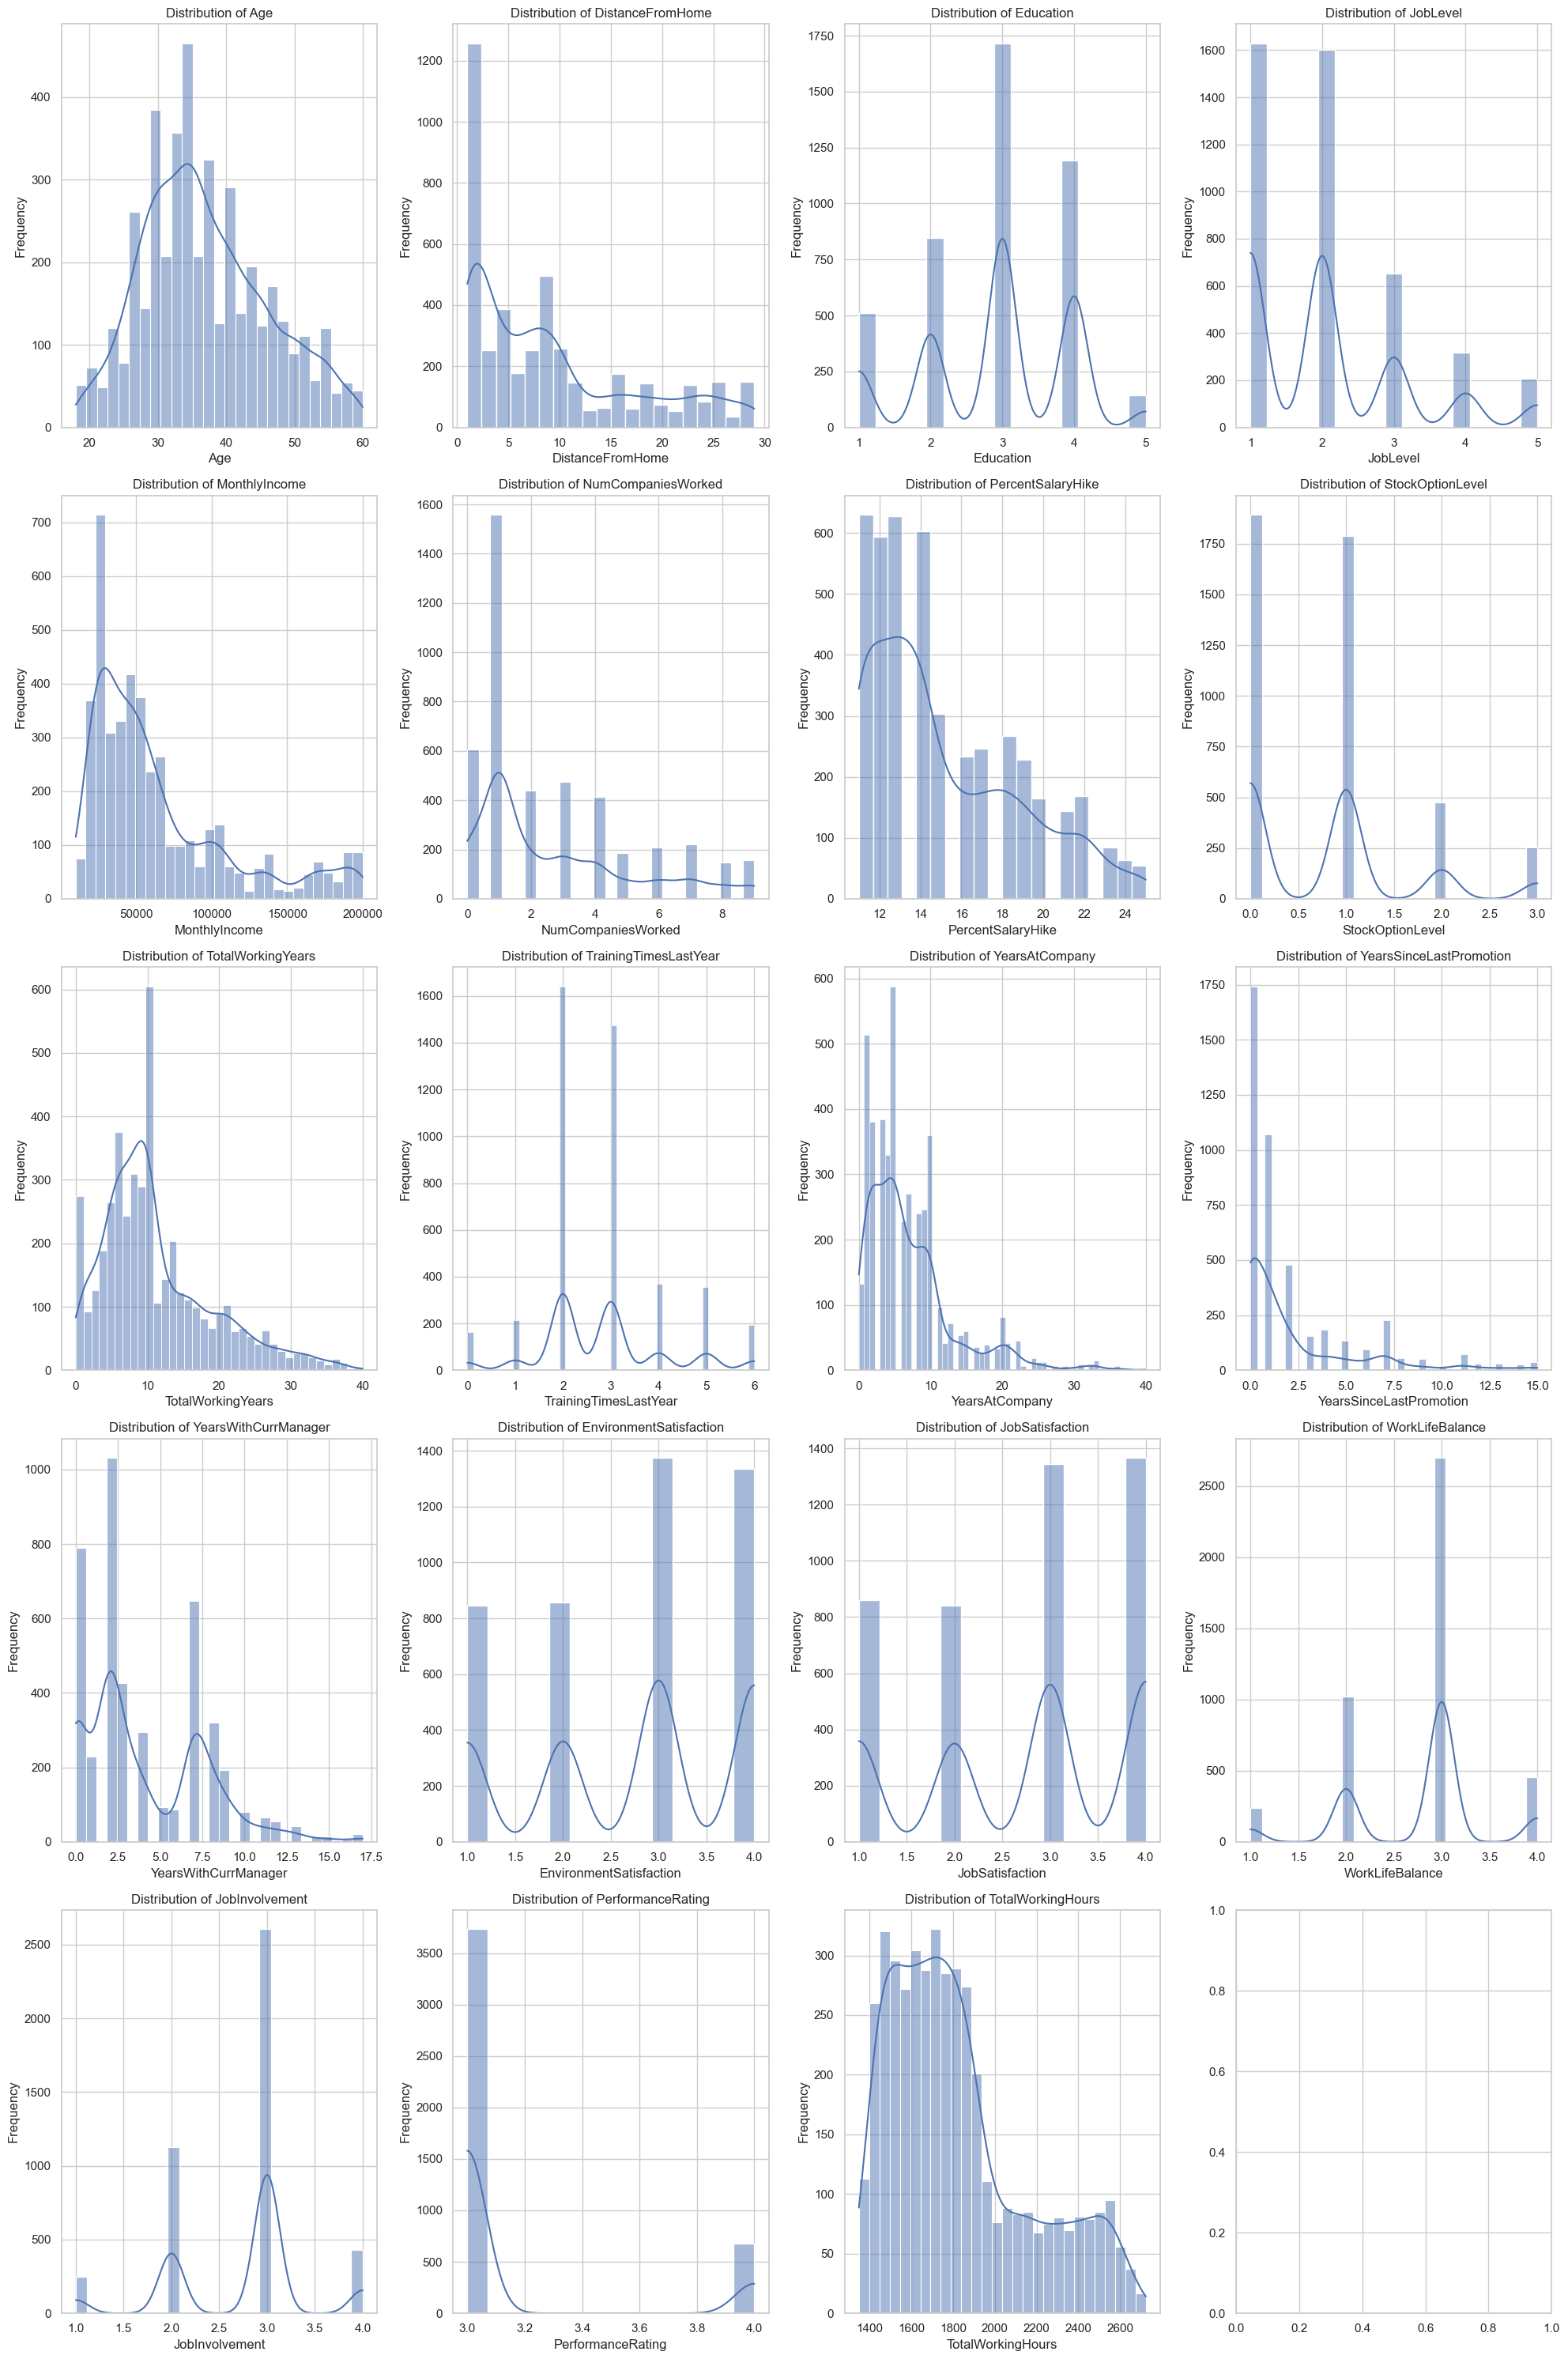

In [6]:
# Setting plot style
sns.set(style="whitegrid")

# Plotting distributions of numerical features
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 30))
axes = axes.flatten()

numerical_cols = exploration_df.select_dtypes(include=['int64']).columns
cols_to_be_excluded = ['EmployeeCount', 'EmployeeID', 'StandardHours'] 
cols_for_analysis = list()

for cols in numerical_cols:
    if cols not in cols_to_be_excluded:
        cols_for_analysis.append(cols)


for i, col in enumerate(cols_for_analysis):
    sns.histplot(exploration_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<h4><b> Insights on above visualizations </b></h4>

* Most of the employees stay nearby their work location, with very few employees living farther away
* Majority of the employees hired by this organization are at a lower job level, with fewer employees at higher level
* The distribution of NumCompaniesWorked is right-skewed, which indicates that most employees have worked at fewer companies
* Majority of the employees have worked for less than 10 years at this organization, with few employees being a part of this organization for more than 10 years
* Looking at the distribution of YearsSinceLastPromotion, majority of the employees have been promoted within the last 2.5 years

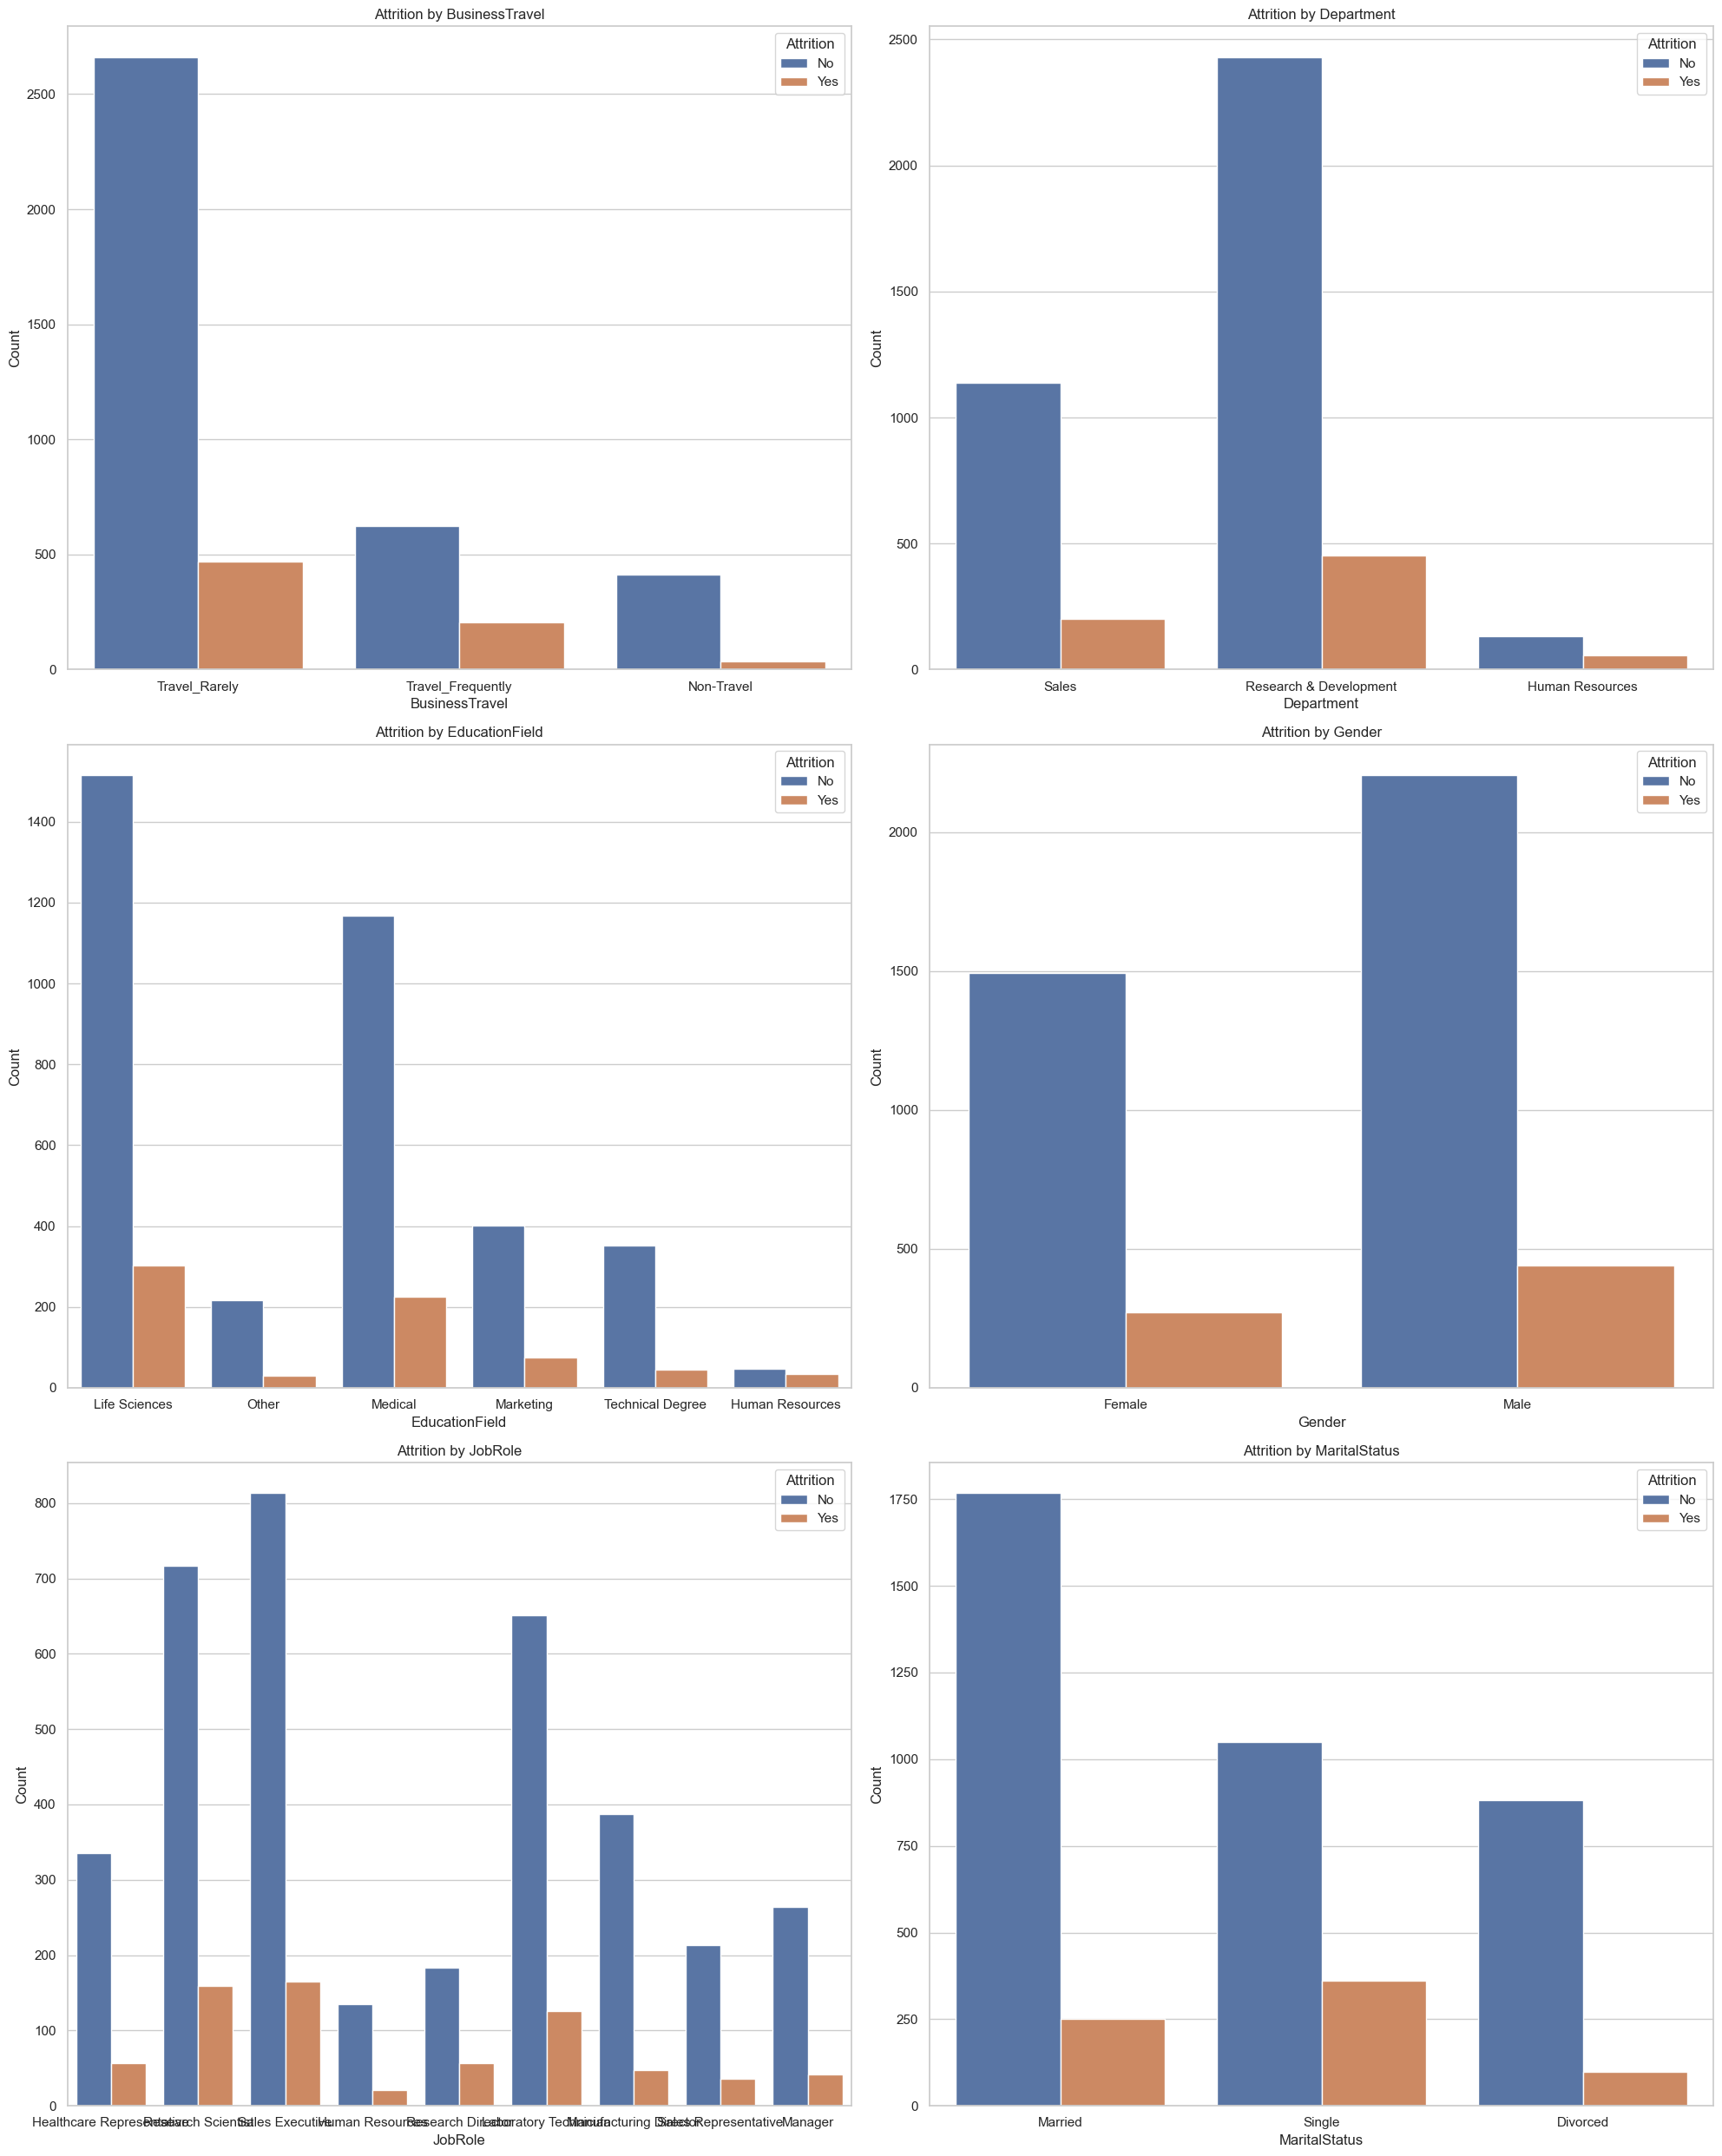

In [7]:
# Plotting attrition rates across different categorical features
categorical_cols = exploration_df.select_dtypes(include=['object']).columns
excluded_cols = ['Attrition', 'Over18']
categorical_cols = [col for col in categorical_cols if col not in excluded_cols]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Attrition', data=exploration_df, ax=axes[i])
    axes[i].set_title(f'Attrition by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Attrition', loc='upper right')

plt.tight_layout()
plt.show()

<h4><b> General Insights for the above visualizations </b></h4>

* The attrition rates are higher among employees with frequent business travels, suggesting that travel demands may lead to burnout or work-life imbalance
* Higher attrition rates among single employees may be due to factors such as work-life balance or relocation flexibility

These insights may or may not be valid since there is an imbalance in the data with respect to the Attrition variable. Thus, before developing the probability model, SMOTE analysis must be used to eliminate this imbalance.

<h4><b> Correlation matrix for numerical variables </b></h4>


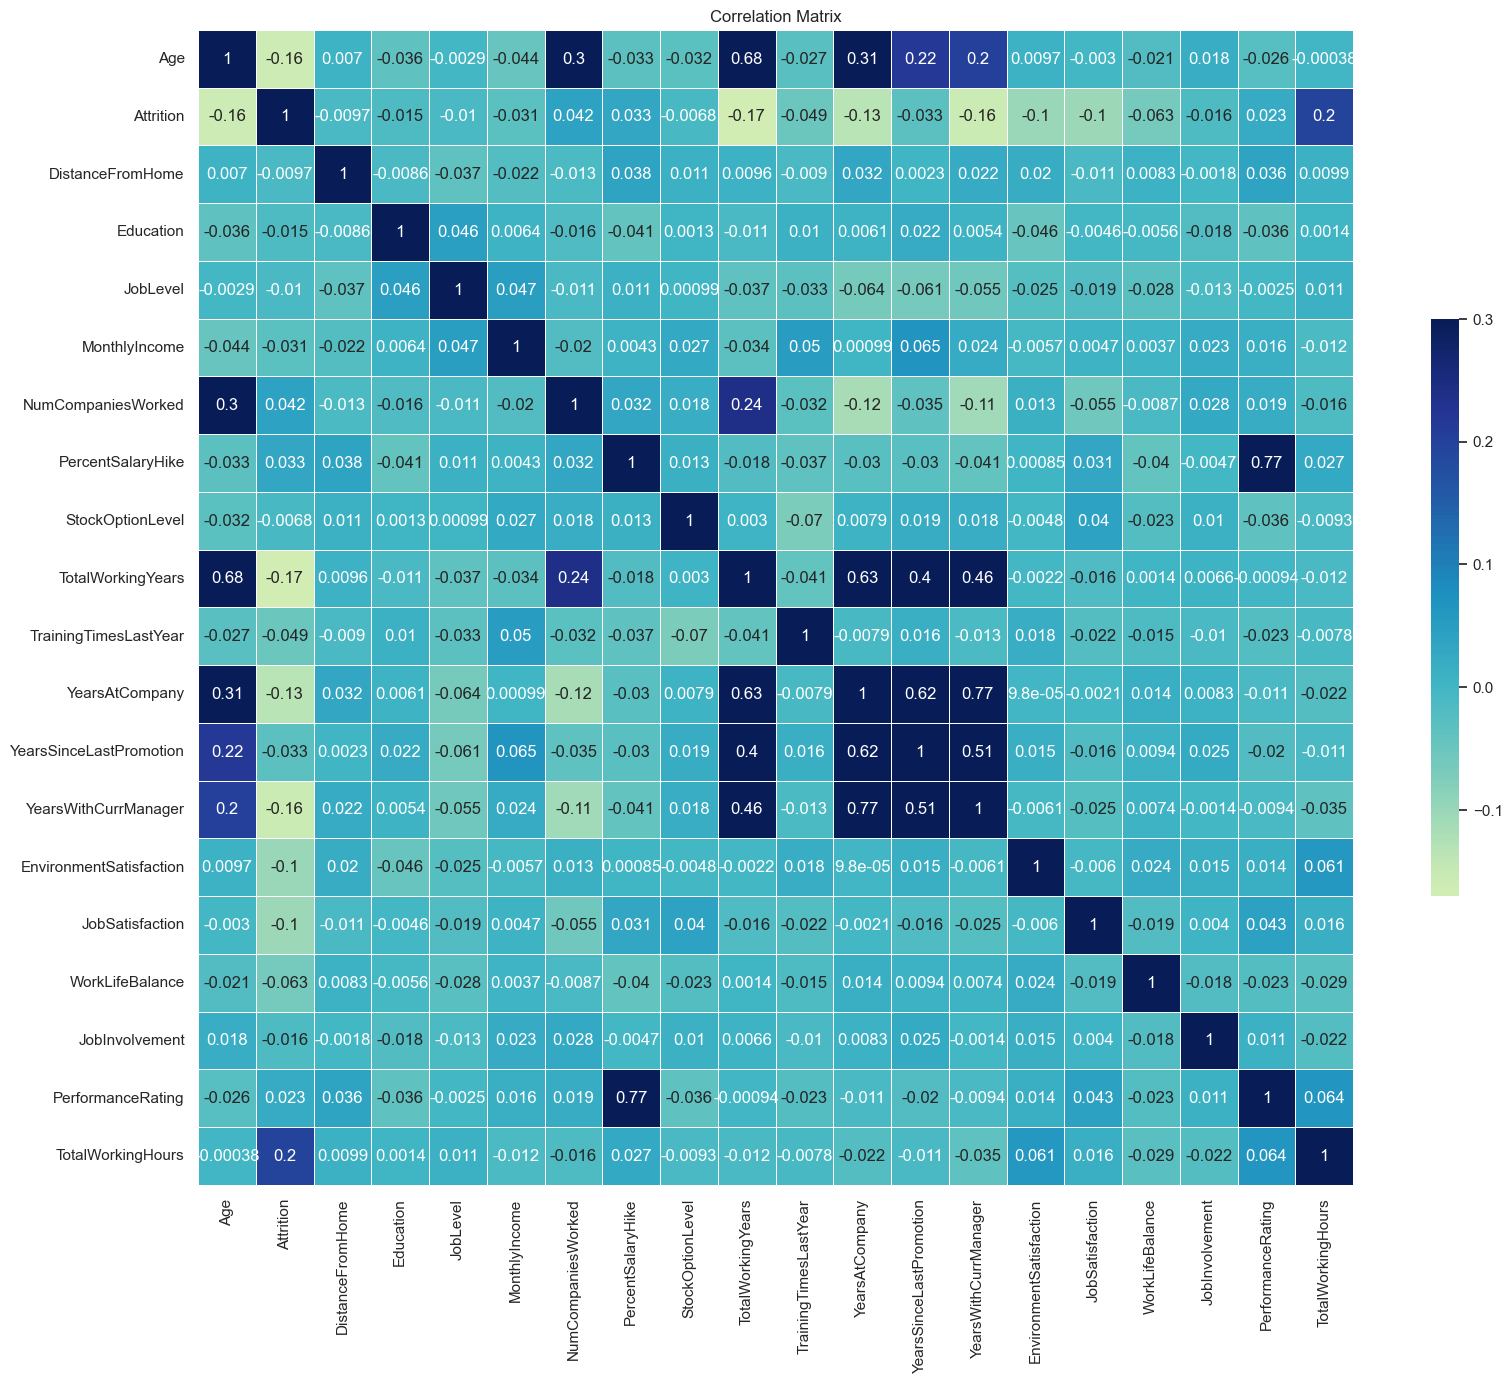

In [8]:
# Converting 'Attrition' to a numerical variable for correlation analysis
exploration_df['Attrition'] = exploration_df['Attrition'].map({'Yes': int(1), 'No': int(0)})

#Selecting numerical columns for correlation analysis
corr_cols = exploration_df.select_dtypes(include='Int64').columns

#excluding columns which do not have any correlation with Attrition (cols_to_be_excluded is defined above)
corr_cols = [col for col in corr_cols if col not in cols_to_be_excluded]

#passing the list of selected columns as index for obtaining the final correlation dataframe
corr_df = exploration_df[corr_cols]

# Generating the correlation matrix 
corr_matrix = corr_df.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(20, 15))

# Drawing the heatmap with correct aspect ratio
sns.heatmap(corr_matrix, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix')
plt.show()

<h4><b> Correlation analysis </b></h4>

* The correlation matrix suggests positive correlation of TotalWorkingHours with Attrition rate. This denotes that people working more hours are likely to leave the organization
* Also total working years and years at company have slightly negative correlation with Attrition rate, which implies that people with more experience are less likely to leave the company and people who get stabilized in this organization are also less likely to leave


In [9]:
#Converting back boolean labels to string labels of Attrition variable for further analysis
exploration_df['Attrition'] = exploration_df['Attrition'].map({1: 'Yes', 0: 'No'})


In [12]:
#rechecking the labels of Attrition variable
exploration_df['Attrition'].values

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [11]:
attrition_modelling_df = exploration_df
attrition_modelling_df.to_csv('modelling.csv')

<b>modelling.csv:</b> This file will further be used for attrition probability modelling using multiple models